In [28]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading the data
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [7]:
#Preprocesing the data

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
#Data Analysis

<AxesSubplot: >

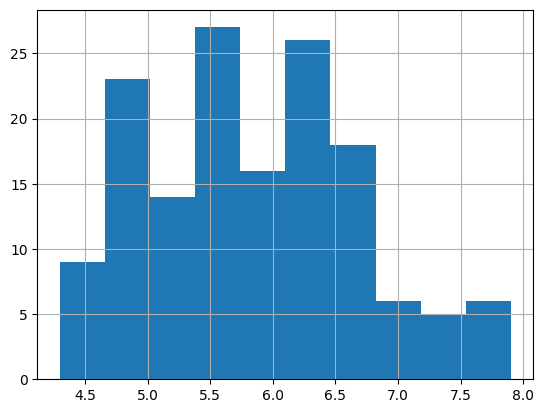

In [10]:
df['sepal_length'].hist()

<AxesSubplot: >

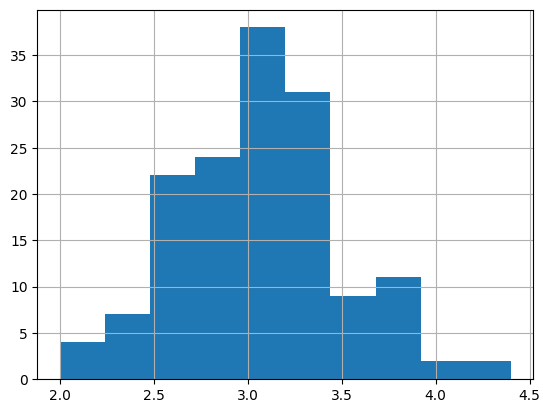

In [11]:
df['sepal_width'].hist()

<AxesSubplot: >

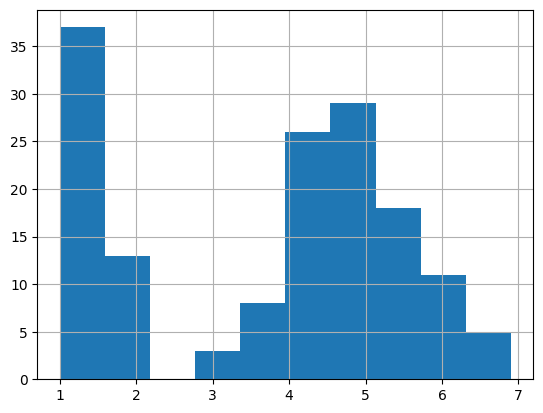

In [12]:
df['petal_length'].hist()

<AxesSubplot: >

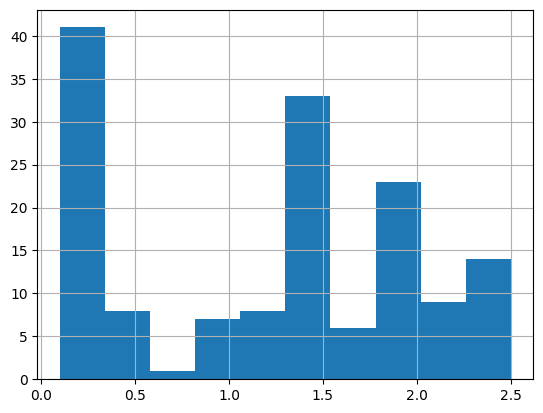

In [13]:
df['petal_width'].hist()

In [19]:
#display the correaltion matrix
df.corr()

C:\Users\LEVONO\AppData\Local\Temp\ipykernel_7468\2359830764.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\LEVONO\AppData\Local\Temp\ipykernel_7468\1860814082.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


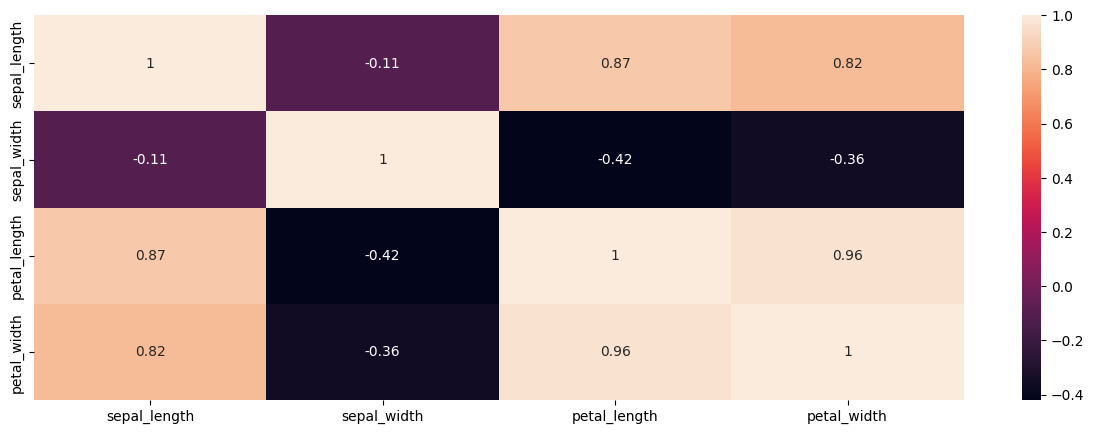

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
X = df.drop(columns=['species'])
#output data
Y = df['species']
#split the data for train and test
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.30)

In [25]:
#Logistic Regression
model = LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy: ", model.score(x_test,y_test)*100)

Logistic Regression Accuracy:  97.77777777777777


In [26]:
#model training
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [29]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [30]:
#K-Nearest Neighbors
model = KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("K-Nearest neighbors Accuracy: ", model.score(x_test,y_test)*100)

K-Nearest neighbors Accuracy:  97.77777777777777


In [31]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [33]:
#Decision Tree 
model = DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print("Decision Tree Accuracy: ",model.score(x_test,y_test)*100)

Decision Tree Accuracy:  93.33333333333333


In [34]:
#model training
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [35]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


In [36]:
import pickle
filename = 'saved_model.sav'
pickle.dump(model,open(filename,'wb'))

In [38]:
load_model = pickle.load(open(filename, 'rb'))

In [39]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)